In [1]:
import subprocess
import time
import matplotlib.pyplot as plt

In [7]:
# Set the path to your compiled C++ executable
executable = r"./game_of_life"  # Change this to your actual compiled file name
input_file = "random_10000_in.gol"
output_file = "random_10000_out.gol"
generations = 10  # Reduced for quicker testing
max_threads = 16  # Adjust based on your CPU core count
runs_per_thread = 5  # To average out results

In [8]:
def run_cpp_program(threads):
    """Runs the C++ program with a specific number of threads and returns the execution time."""
    cmd = [
        executable,
        "--mode", "omp",
        "--threads", str(threads),
        "--load", input_file,
        "--save", output_file,
        "--generations", str(generations),
        "--measure"
    ]

    try:
        start_time = time.time()
        subprocess.run(cmd, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        end_time = time.time()
        return end_time - start_time
    except subprocess.CalledProcessError as e:
        print(f"Error running the program: {e}")
        return float('inf')

def find_optimal_threads():
    """Tests multiple thread counts and measures performance."""
    results = []
    for threads in range(1, max_threads + 1):
        print(f"Testing with {threads} threads...")
        times = [run_cpp_program(threads) for _ in range(runs_per_thread)]
        avg_time = sum(times) / runs_per_thread
        results.append((threads, avg_time))
    
    return results


Testing with 1 threads...
Testing with 2 threads...
Testing with 3 threads...
Testing with 4 threads...
Testing with 5 threads...
Testing with 6 threads...
Testing with 7 threads...
Testing with 8 threads...
Testing with 9 threads...
Testing with 10 threads...
Testing with 11 threads...
Testing with 12 threads...
Testing with 13 threads...
Testing with 14 threads...
Testing with 15 threads...
Testing with 16 threads...


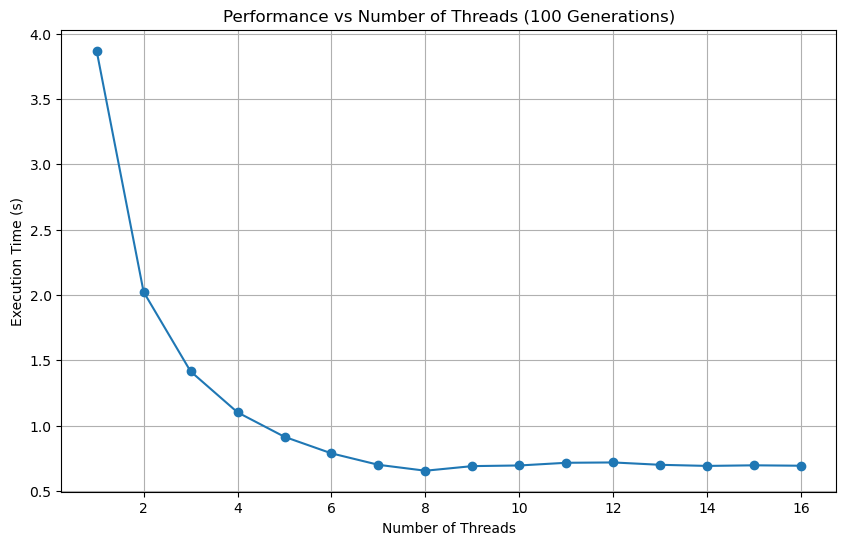

Optimal thread count: 8


In [9]:
# Run the optimization test
results = find_optimal_threads()

# Plot results
threads, times = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(threads, times, marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Performance vs Number of Threads (100 Generations)')
plt.grid(True)
plt.show()

# Suggest optimal thread count
optimal_threads = threads[times.index(min(times))]
print(f"Optimal thread count: {optimal_threads}")

Testing with 1 threads...
Testing with 2 threads...
Testing with 3 threads...
Testing with 4 threads...
Testing with 5 threads...
Testing with 6 threads...
Testing with 7 threads...
Testing with 8 threads...
Testing with 9 threads...
Testing with 10 threads...
Testing with 11 threads...
Testing with 12 threads...
Testing with 13 threads...
Testing with 14 threads...
Testing with 15 threads...
Testing with 16 threads...


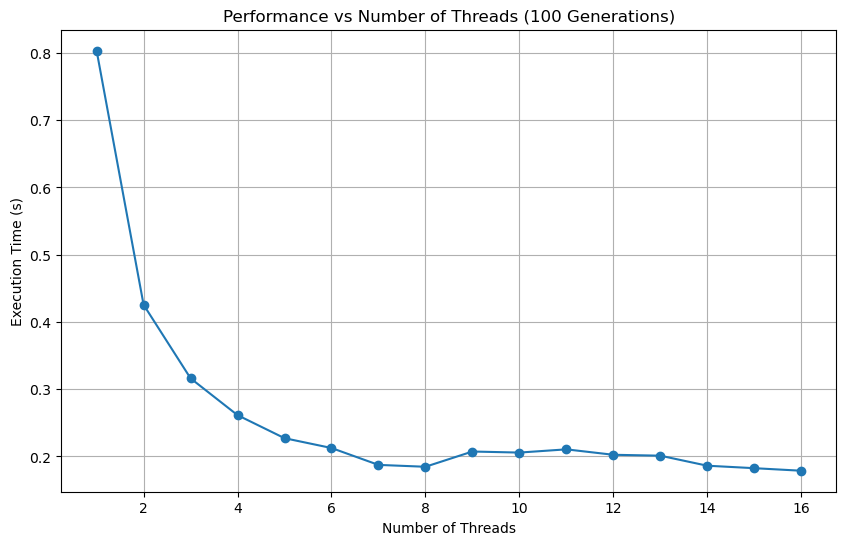

Optimal thread count: 16


In [10]:
# Run the optimization test
results = find_optimal_threads()

# Plot results
threads, times = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(threads, times, marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Performance vs Number of Threads (100 Generations)')
plt.grid(True)
plt.show()

# Suggest optimal thread count
optimal_threads = threads[times.index(min(times))]
print(f"Optimal thread count: {optimal_threads}")